In [75]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [5]:
# Loading the datasets
customers_df = pd.read_csv('Customers.csv')  # Replace with your file path
transactions_df = pd.read_csv('Transactions.csv')  # Replace with your file path

In [7]:
# Merging Customers.csv and Transactions.csv
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID')

In [35]:
# Aggregating transaction data to create customer-level features
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',             # Total spending
    'Quantity': 'sum',               # Total quantity purchased
    'TransactionID': 'count',        # Number of transactions
    'Region': 'first'                # Region (categorical)
}).reset_index()

customer_features.head()

,CustomerID,TotalValue,Quantity,TransactionID,Region
0,C0001,3354.52,12,5,South America
1,C0002,1862.74,10,4,Asia
2,C0003,2725.38,14,4,South America
3,C0004,5354.88,23,8,South America
4,C0005,2034.24,7,3,Asia


In [37]:
# Using One-hot encoding to encode the 'Region' column
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [39]:
# Scaling the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

In [41]:
# Performing K-Means Clustering
db_scores = []
silhouette_scores = []
clusters_range = range(2, 11)

In [43]:
for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    
    # Calculating Davies-Bouldin Index and Silhouette Score
    db_index = davies_bouldin_score(scaled_features, labels)
    silhouette_avg = silhouette_score(scaled_features, labels)
    
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

In [61]:
print("DB index :", db_index)
print("Silhoutte score: ",silhouette_avg)

DB index : 0.7900283857568402
Silhoutte score:  0.4376314340223128


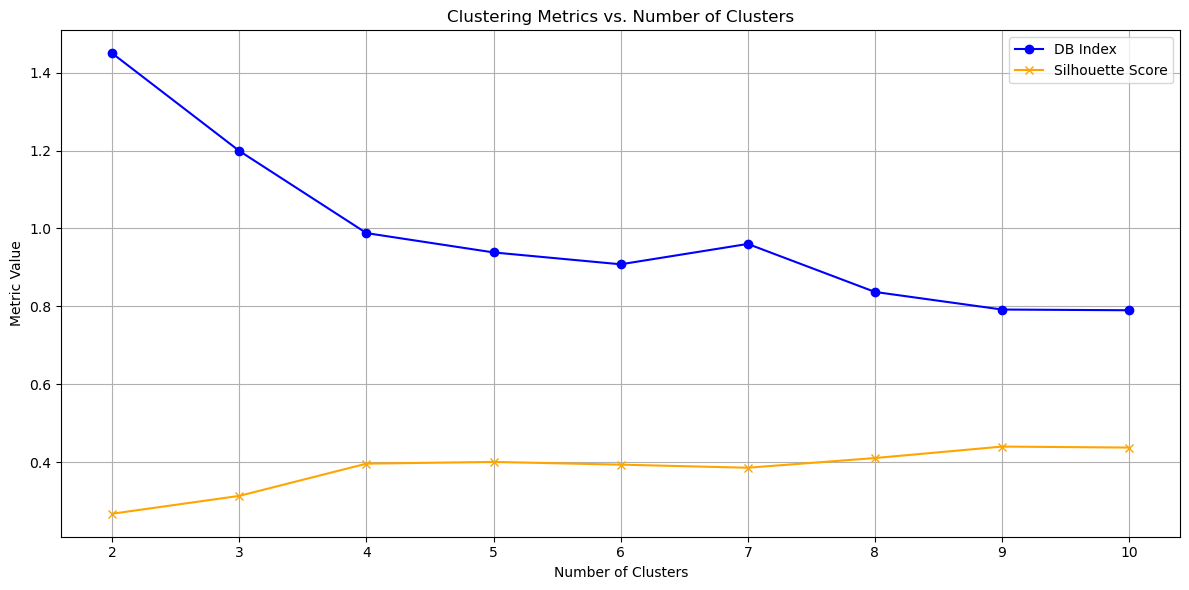

In [45]:
# Plotting DB Index and Silhouette Score for different cluster sizes
plt.figure(figsize=(12, 6))
plt.plot(clusters_range, db_scores, marker='o', label='DB Index', color='blue')
plt.plot(clusters_range, silhouette_scores, marker='x', label='Silhouette Score', color='orange')
plt.title('Clustering Metrics vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Metric Value')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [47]:
# Choosing the optimal number of clusters (based on lowest DB Index)
optimal_k = clusters_range[np.argmin(db_scores)]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 10


In [49]:
# Final Clustering with Optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

In [55]:
# Visualize Clusters (Using PCA for Dimensionality Reduction)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

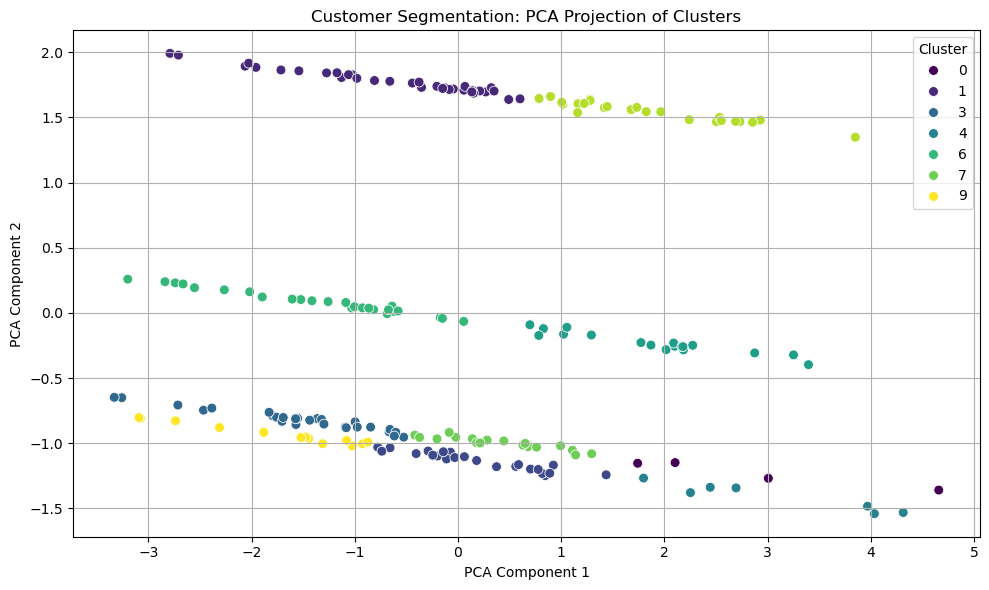

In [57]:
#Plotting the clusters after PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title('Customer Segmentation: PCA Projection of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.show()